# 1. 데이터

In [2]:
# 유튜브 https://www.youtube.com/playlist?list=PLC_wC_PMBL5MnqmgTLqDgu4tO8mrQakuF를 참고
# https://kaggle-kr.tistory.com/18?category=868316 강의 자료

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # plt의 그림 표기는 seaborn으로
sns.set(font_scale = 2.5) # 모든  폰트 사이즈는 2.5

import missingno as msno # NaN값을 쉽게 볼 수 있는 라이브러리

import warnings # ignore
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.shape

(891, 12)

In [7]:
df_train.describe() # 각 피처 통계 확인(결측치를 알 수 있음, 카테고리 형은 나오지 않는 듯)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df_train.columns # 컬럼명 확인

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# NaN값 비율 확인

In [11]:
for col in df_train.columns:
    # 컬럼명을 우측정렬하고, 각 컬럼별 데이터(df_train[col]) 중 isnull로 boolean으로 값을 나타내고, NaN은 전부 합함.
    # 그것들을 각 컬럼의 열 수로 나누면 NaN 퍼센트를 알 수 있음.
    msg = 'column: {:>10} \t Percent of NaN value: {:.2f}%'.format(col, 100 * 
                                                                   (df_train[col].isnull().sum() / df_train[col].shape[0]))
# 값 모르면 하나씩 찍어보기
#     print(df_train[col]) # 컬럼명에 해당하는 값이 나옴. PassengerId면 사람 이름...
#     print(df_train[col].isnull()) # 값이 NaN이면 True 아니면 False
    print(df_train[col].isnull().sum()) # 각 컬럼에 해당하는 값들의 NaN값의 갯수를 합함
#     print(df_train[col].shape[0]) # == ("892",) NaN의 갯수 / 전체 갯수
    print(msg)

0
column: PassengerId 	 Percent of NaN value: 0.00%
0
column:   Survived 	 Percent of NaN value: 0.00%
0
column:     Pclass 	 Percent of NaN value: 0.00%
0
column:       Name 	 Percent of NaN value: 0.00%
0
column:        Sex 	 Percent of NaN value: 0.00%
177
column:        Age 	 Percent of NaN value: 19.87%
0
column:      SibSp 	 Percent of NaN value: 0.00%
0
column:      Parch 	 Percent of NaN value: 0.00%
0
column:     Ticket 	 Percent of NaN value: 0.00%
0
column:       Fare 	 Percent of NaN value: 0.00%
687
column:      Cabin 	 Percent of NaN value: 77.10%
2
column:   Embarked 	 Percent of NaN value: 0.22%


In [12]:
False + True # print(df_train[col].isnull().sum())을 하면 어떻게 NaN의 값을 세어주는가? True가 1, False가 0이니까 다 더하면 해당 컬럼의 NaN 갯수가 나오는 거.

1

In [13]:
# 자료를 찾거나 변경하고 싶은 line을 클릭만 하고 비활성화(커서가 없는 상태)에서 F를 누르고 원하는 문자만 변경해줄 수 있다.(아래는 위에 거 복사해서 이 방법으로 df_train을 test로 변경한 거임)

In [14]:
for col in df_test.columns:
    # 컬럼명을 우측정렬하고, 각 컬럼별 데이터(df_test[col]) 중 isnull로 boolean으로 값을 나타내고, NaN은 전부 합함.
    # 그것들을 각 컬럼의 열 수로 나누면 NaN 퍼센트를 알 수 있음.
    msg = 'column: {:>10} \t Percent of NaN value: {:.2f}%'.format(col, 100 * 
                                                                   (df_test[col].isnull().sum() / df_test[col].shape[0]))
# 값 모르면 하나씩 찍어보기
#     print(df_test[col]) # 컬럼명에 해당하는 값이 나옴. PassengerId면 사람 이름...
#     print(df_test[col].isnull()) # 값이 NaN이면 True 아니면 False
    print(df_test[col].isnull().sum()) # 각 컬럼에 해당하는 값들의 NaN값의 갯수를 합함
#     print(df_test[col].shape[0]) # == ("892",) NaN의 갯수 / 전체 갯수
    print(msg)

0
column: PassengerId 	 Percent of NaN value: 0.00%
0
column:     Pclass 	 Percent of NaN value: 0.00%
0
column:       Name 	 Percent of NaN value: 0.00%
0
column:        Sex 	 Percent of NaN value: 0.00%
86
column:        Age 	 Percent of NaN value: 20.57%
0
column:      SibSp 	 Percent of NaN value: 0.00%
0
column:      Parch 	 Percent of NaN value: 0.00%
0
column:     Ticket 	 Percent of NaN value: 0.00%
1
column:       Fare 	 Percent of NaN value: 0.24%
327
column:      Cabin 	 Percent of NaN value: 78.23%
0
column:   Embarked 	 Percent of NaN value: 0.00%


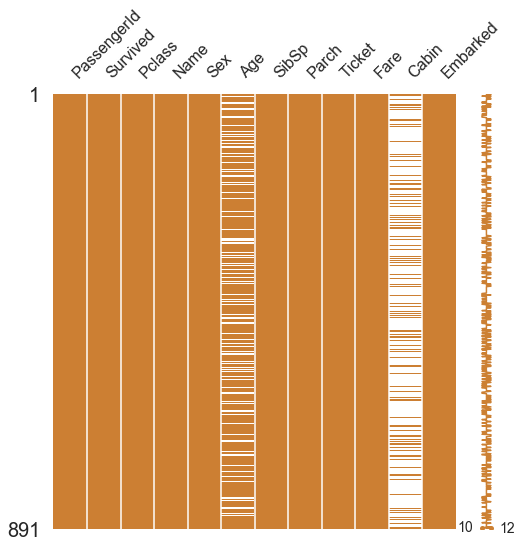

In [15]:
#  missingno로 matrix를 만들어서 NaN값 분포를 알 수 있음
msno.matrix(df = df_train.iloc[:], figsize = (8, 8), color = (0.8, 0.5, 0.2)) # color는 rgb임 전부 1이면 백

In [16]:
# 타깃의 분포를 알아야 한다.
# 100명 중 1명 생존일 때 100명 다 사망이라고 해버리면 정확도는 99%지만 모델의 생존율 정확도는 0%라서 모델의 타겟 밸런스가 중요함.

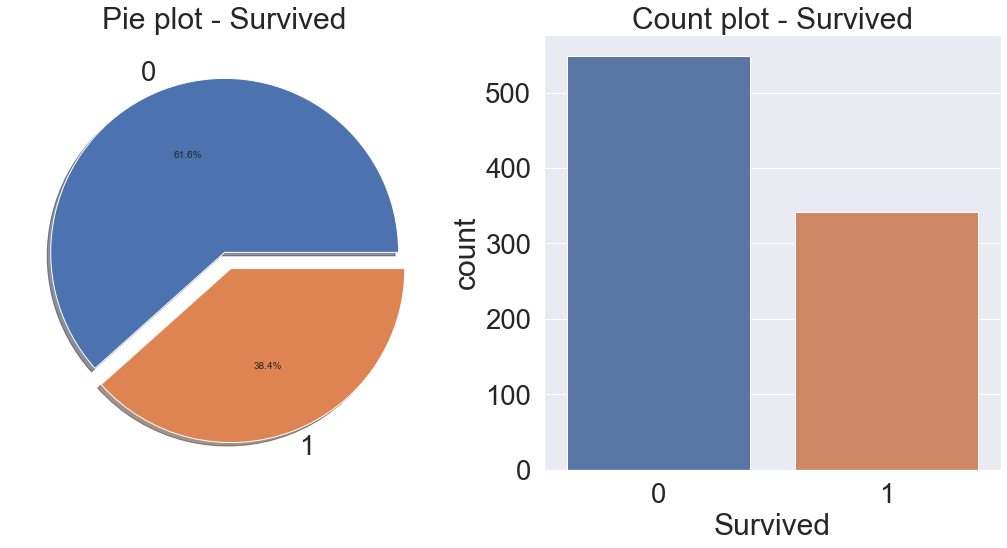

In [18]:
# 1은 low, 2는 col, 1행에 2개의 파트로 나눠진 배경을 준비. figsize는 가로, 세로
# f에 배경값 , ax에 위치값이 들어감
f, ax = plt.subplots(1, 2, figsize = (18, 8)) 

# .pie: 파이 모양으로 그려짐
# explode: 좌측이 [0]값인 0의 값의 자리이고 둘 다 0이면 그냥 파이모양인데 값을 올리면 해당 위치값에 해당하는 그래프가 원의 중심에서 바깥으로 이동, -하면 원의 중심쪽으로 이동.
# ax: 도화지 어디에서 그릴 것인가? 첫 번째 위치에 그림.
df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True) # 소숫점 첫째 자리까지만 표현
ax[0].set_title('Pie plot - Survived')  # 좌측 그래프 명
ax[0].set_ylabel('') # ylabel명은 없앰, 안 해주면 Survived가 생김
sns.countplot('Survived', data = df_train, ax = ax[1]) # 세어주는 plot인데 이름은 Survived, 데이터는 df_train, 두 번째에 그려줌
ax[1].set_title('Count plot - Survived')
plt.show()
# print(df_train['Survived'].value_counts()) # [[0, 549], [1, 342]] 각 레이블의 값의 갯수를 반환(series)

# 2. EDA - Pclass

In [19]:
# 카테고리형 데이터(데이터의 순위가 없음)

In [20]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).count() # Pclass x에 해당하는 survived의 값(0, 1)들을 다 더하면 y가 나옴

,Pclass,Survived
0,1,216
1,2,184
2,3,491


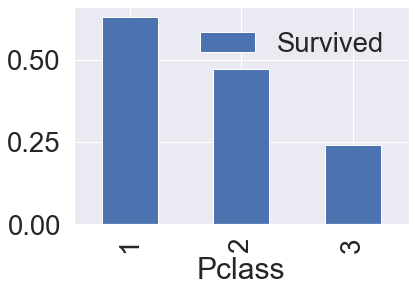

In [21]:
# as_index는 groupby로 묶어준 피처를 인덱스로 할 것이냐 아니냐(True하면 나중에 그림을 못 그림)
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar()

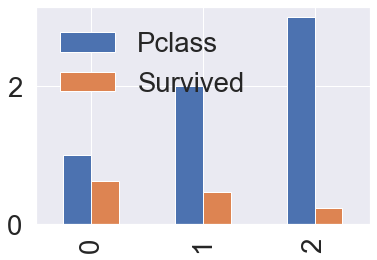

In [23]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False).plot.bar()

In [24]:
df_train[['Pclass', 'Survived']] # 시리즈가 2개부터는 DF니까 팬시인덱싱을 사용하기 위해서.

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
5,3,0
6,1,0
7,3,0
8,3,1
9,2,1


In [25]:
for i in df_train[['Pclass', 'Survived']].groupby(['Pclass']): # Pclass 기준으로 그룹을 해주는데 Pclass는 3개의 값을 가지고 있으니 i도 3개
    print(i)
    print("check")

(1,      Pclass  Survived
1         1         1
3         1         1
6         1         0
11        1         1
23        1         1
27        1         0
30        1         0
31        1         1
34        1         0
35        1         0
52        1         1
54        1         0
55        1         1
61        1         1
62        1         0
64        1         0
83        1         0
88        1         1
92        1         0
96        1         0
97        1         1
102       1         0
110       1         0
118       1         0
124       1         0
136       1         1
137       1         0
139       1         0
151       1         1
155       1         0
..      ...       ...
763       1         1
765       1         1
766       1         0
779       1         1
781       1         1
782       1         0
789       1         0
793       1         0
796       1         1
802       1         1
806       1         0
809       1         1
815       1         0
820   

In [26]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True) #margin을 F로 하면 All이 안 뜸

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [27]:
# 여기까지의 자료들로 확인된 것, 클래스가 높을수록(1이 가장 높다) 생존율이 높다.

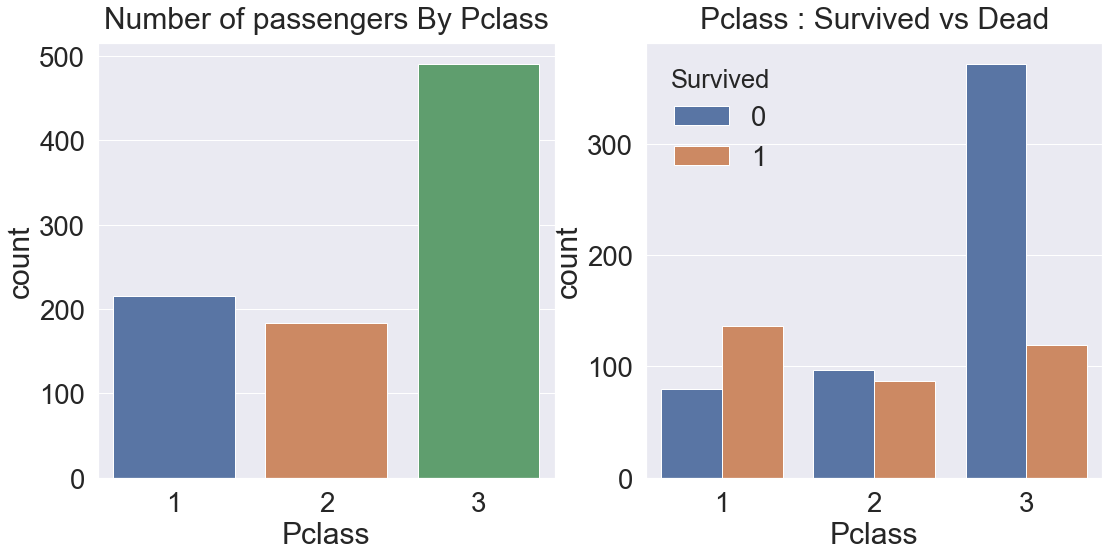

In [28]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8)) # (1, 2)공간의 도화지 생성
# Pclass 값들 갯수를 세서 bar차트 생성 후 (1, 1)위치에 넣어줌
# df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
sns.countplot('Pclass', data = df_train, ax = ax[0])
ax[0].set_title('Number of passengers By Pclass', y = y_position) # y는 타이틀과 그래프상의 거리
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)
plt.show()

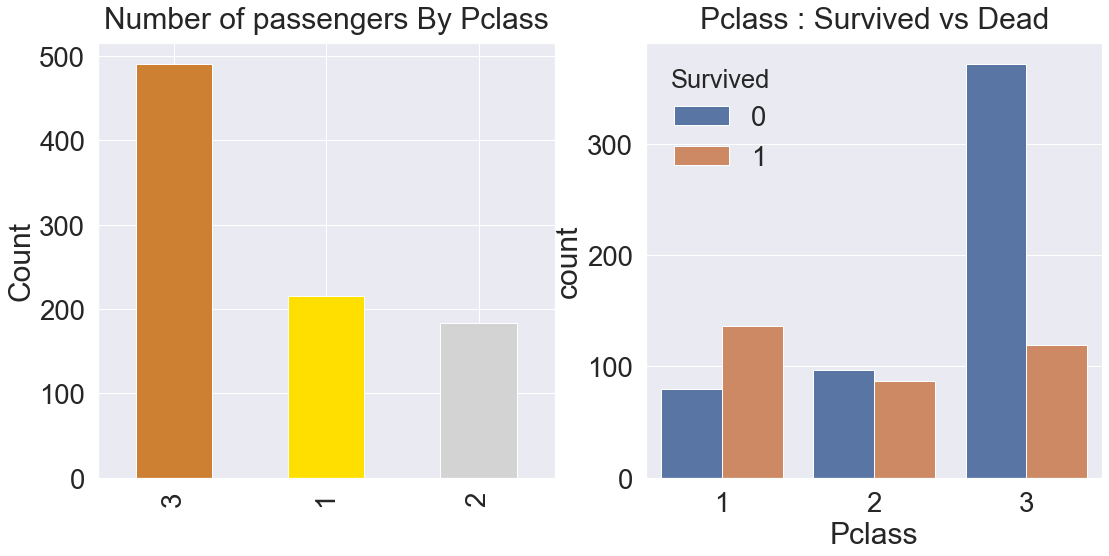

In [29]:
# plot.bar에는 ylabel 기본값이 없나봄

y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8)) # (1, 2)공간의 도화지 생성
# Pclass 값들 갯수를 세서 bar차트 생성 후 (1, 1)위치에 넣어줌
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of passengers By Pclass', y = y_position) # y는 타이틀과 그래프상의 거리
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax = ax[1]) # 색을 Survived로 구분
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)
plt.show()

In [30]:
#위 그래프를 보면 3등석에 탑승한 사람들이 가장 많지만 1등석에 탑승한 사람들이
#각 등석 인원 대비 생존확률도 높고, 전체적으로 봤을 때도 생존률이 높은 것을 확인

## 3. EDA - Sex

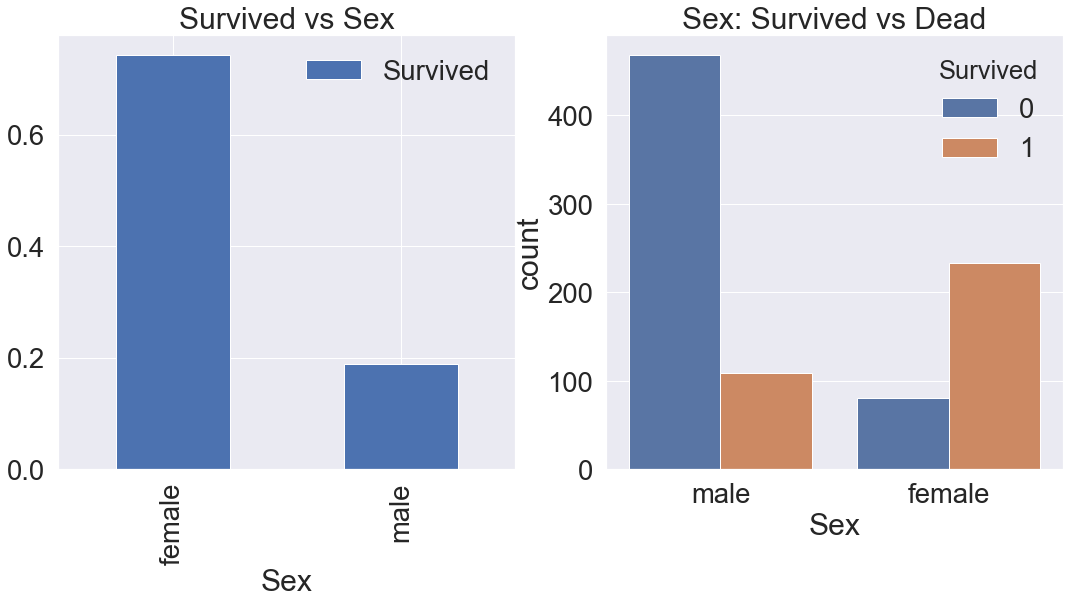

In [31]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [32]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.2 Both Sex and Pclass

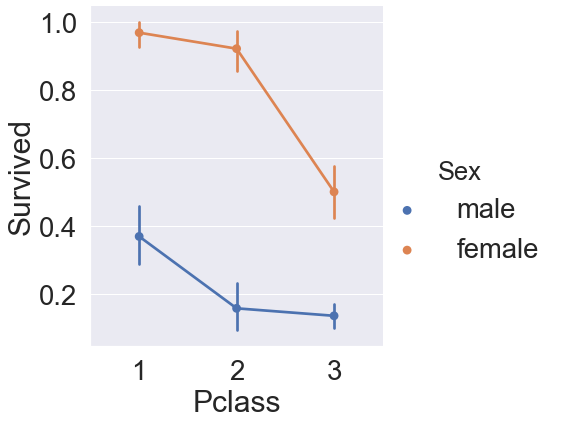

In [33]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train, size = 6, ascept = 1.5)

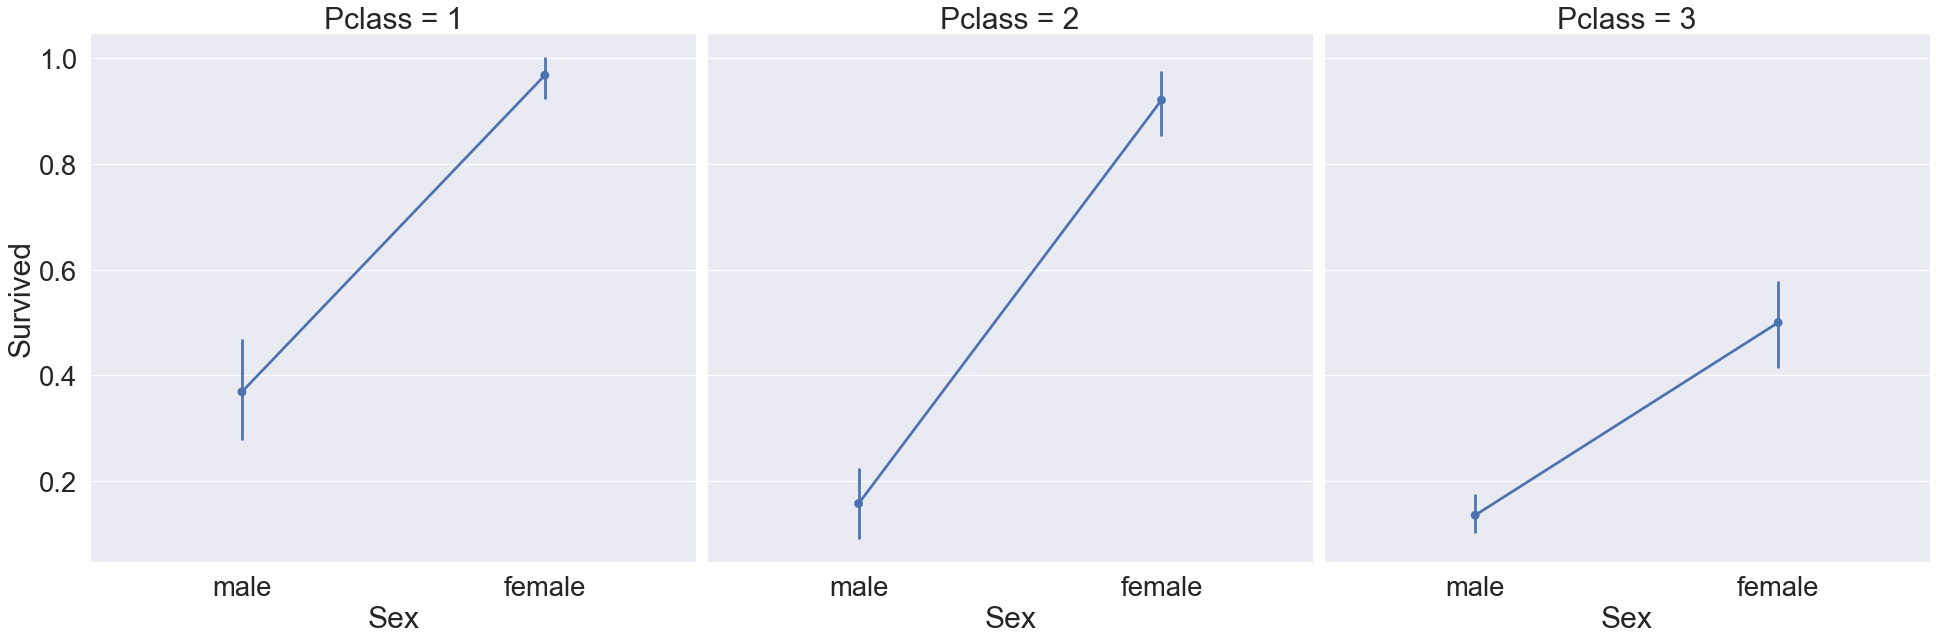

In [34]:
sns.factorplot(x = 'Sex', y = 'Survived', col = 'Pclass', data = df_train, saturation = 5, size = 9, aspect = 1)

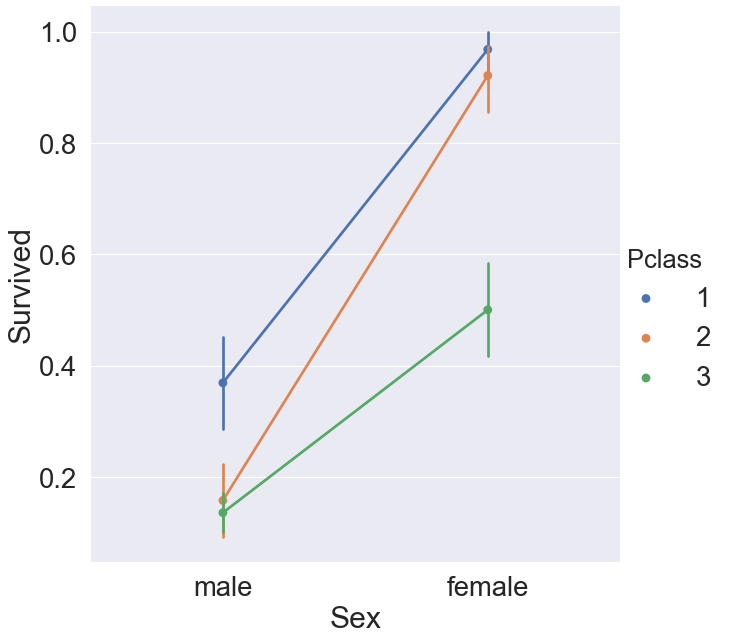

In [35]:
sns.factorplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = df_train, saturation = 5, size = 9, aspect = 1)

## 4. EDA - Age

In [36]:
print("제일 나이 많은 탑승객: {:.1f} years".format(df_train['Age'].max()))
print("제일 어린 탑승객: {:.1f} years".format(df_train['Age'].min()))
print("탑승객 평균 나이: {:.1f} years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 years
제일 어린 탑승객: 0.4 years
탑승객 평균 나이: 29.7 years


In [37]:
# 왜 min이라고 했는데 0.4가 나올까?
df_train['Age'] # 확인을 해보니 정말 나이를 소수점까지 포함해서 기입했다.

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

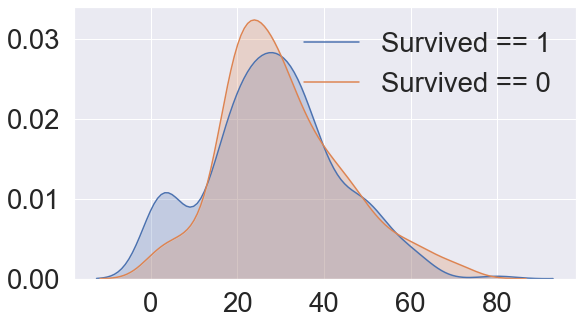

In [38]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
# kernel density estimation(밀도로 나타내서 부드럽게 그려줌)
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax, shade = True) # shade = 그늘
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax, shade = True)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

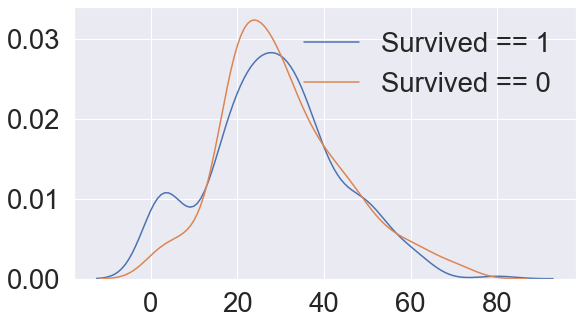

In [39]:
# 이렇게 해줘도 되지만 그릴 그래프가 2개 이상인 경우에는 ax를 써줘야 하니 위의 방법을 숙달하자
fig= plt.subplots(figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'])
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'])
plt.legend(['Survived == 1', 'Survived == 0']) # 범주
plt.show()

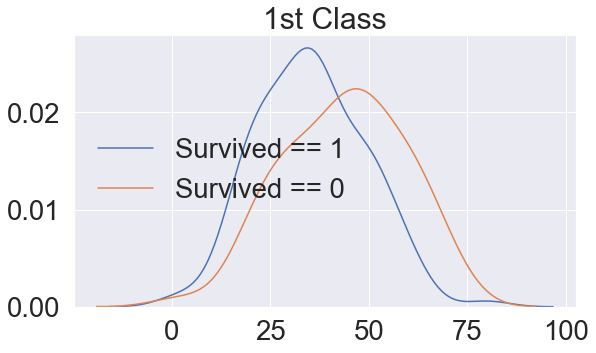

In [40]:
fig= plt.subplots(figsize = (9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'])
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'])
plt.title('1st Class')
plt.legend(['Survived == 1', 'Survived == 0']) # 범주
plt.show()

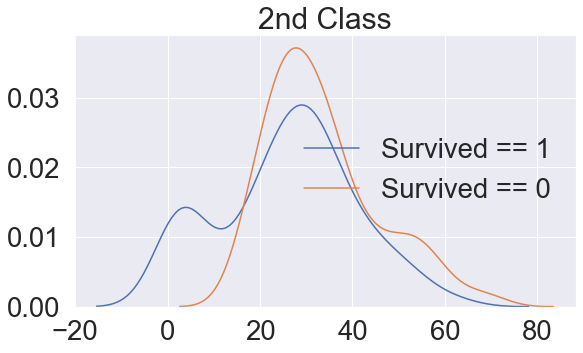

In [41]:
fig= plt.subplots(figsize = (9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'])
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'])
plt.title('2nd Class')
plt.legend(['Survived == 1', 'Survived == 0']) # 범주
plt.show()

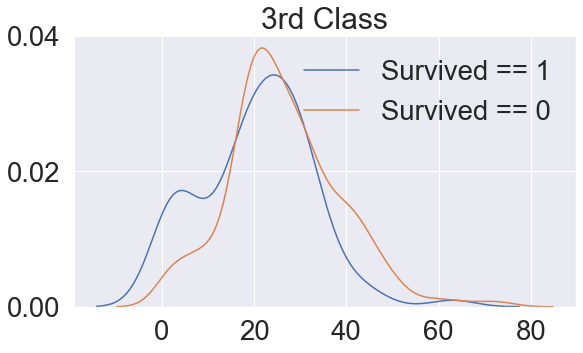

In [42]:
fig= plt.subplots(figsize = (9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'])
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'])
plt.legend(['Survived == 1', 'Survived == 0']) # 범주
plt.title('3rd Class')
plt.show()

In [43]:
# 나이가 어릴수록 생존확률이 높아진다.

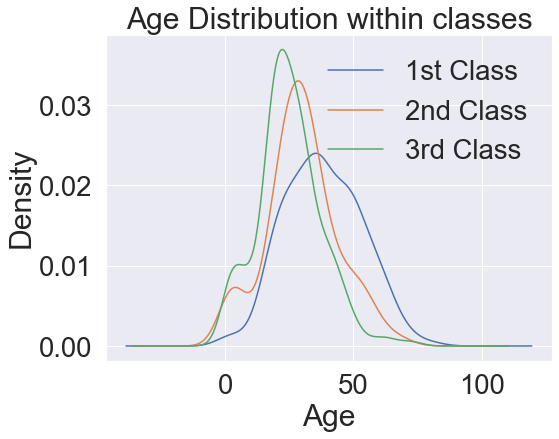

In [44]:
# 클래스별 나이 분포
# plt는 set이 안 붙음
plt.figure(figsize = (8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

# class가 올라갈수록 평균나잇대가 우측으로 증가

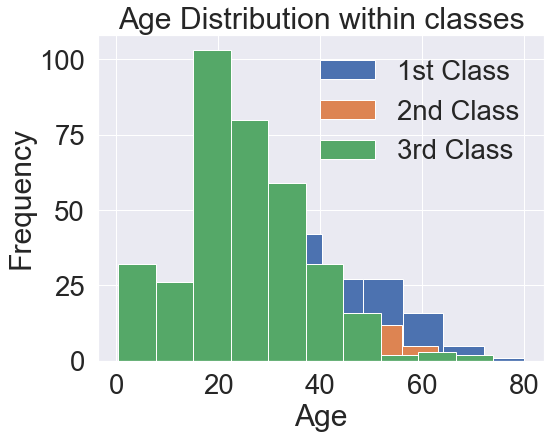

In [45]:
# hist는 이런 식으로 겹치면 안 보임
plt.figure(figsize = (8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'hist')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'hist')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'hist')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

Text(0.5, 0, 'sdf')

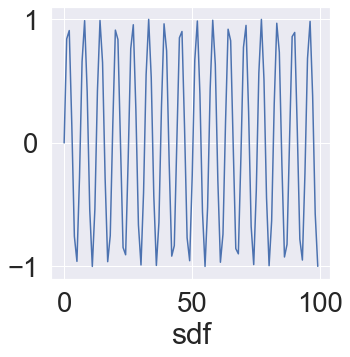

In [46]:
# ax로 하면 set이 붙음
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
a = np.arange(100)
b = np.sin(a)

ax.plot(b)
ax.set_xlabel('sdf')

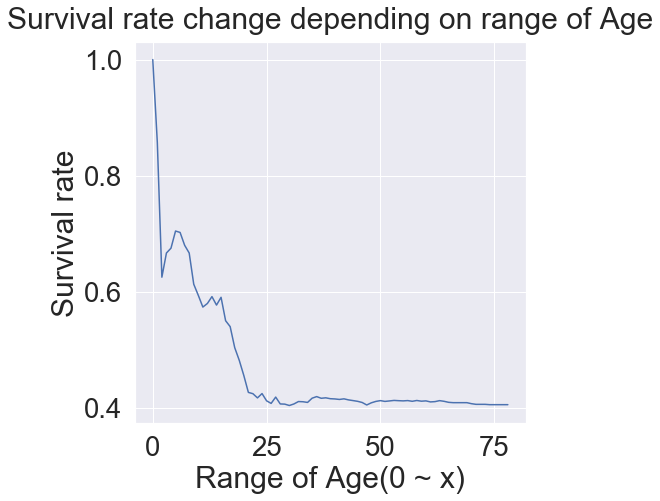

In [47]:
# 나이에 따른 생존률
change_age_range_survival_ratio = []

for i in range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() /
                                          len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize = (7, 7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0 ~ x)')
plt.show()

## 5. EDA - Age, Sex, Pclass (violinplot)

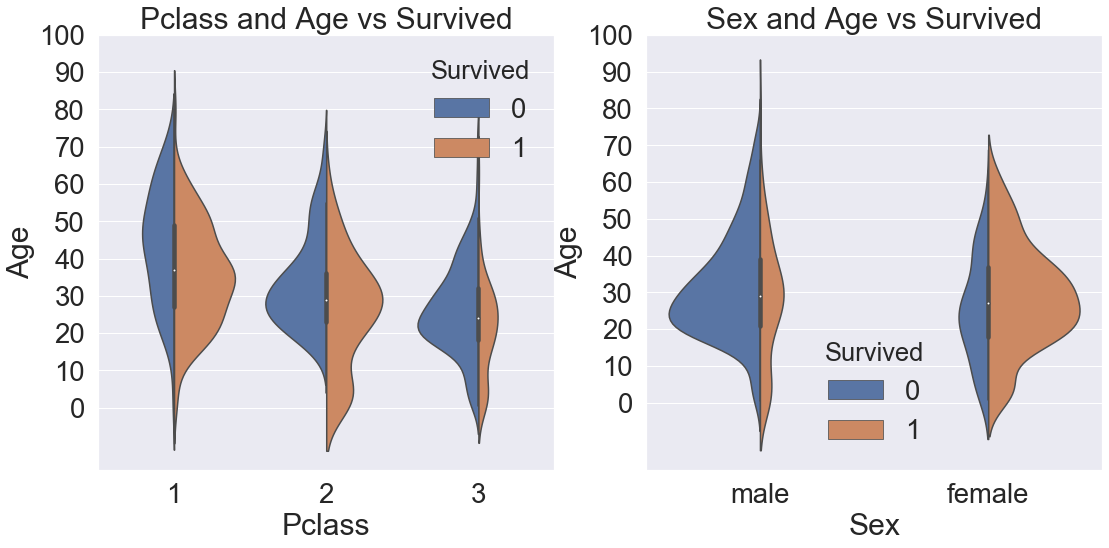

In [48]:
# Pclass에 따른 Age의 Survived
f, ax = plt.subplots(1, 2, figsize = (18, 8))
# scale을 area로 하면 면적이 같아져서 분포상태를 볼 수는 있지만 가늠이 안 됨
# count로 하면 비율의 차이를 볼 수 있음(Pclass 같은 경우 생존을 한 사람이 0보다 더 크다는 걸 count로 하면 확 보임)
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10)) # y축을 0부터 110까지 10단위로

sns.violinplot('Sex', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

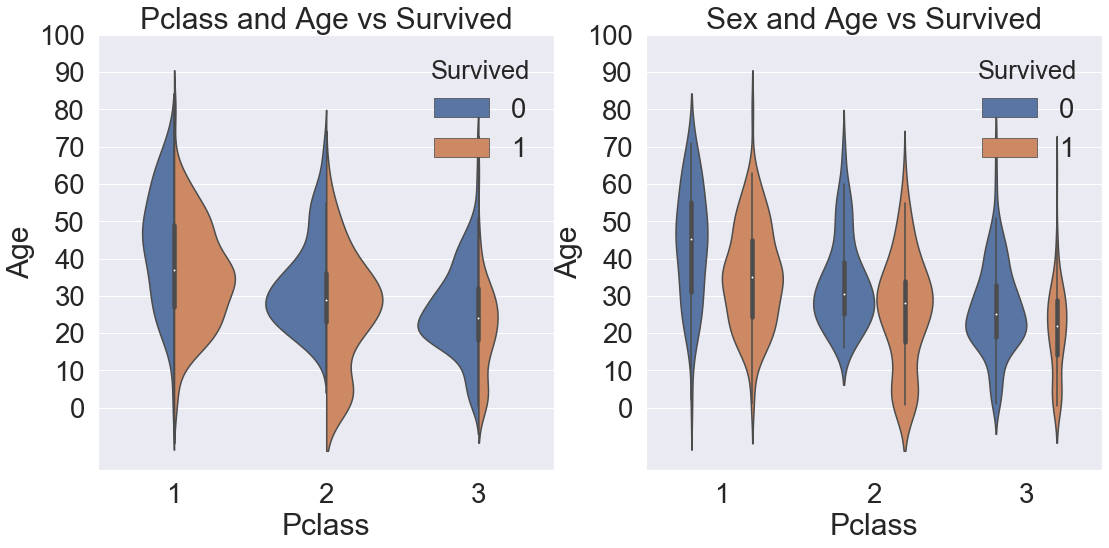

In [49]:
# split T, F 차이
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10)) 

sns.violinplot('Pclass', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = False, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

## 6. EDA - Embarked

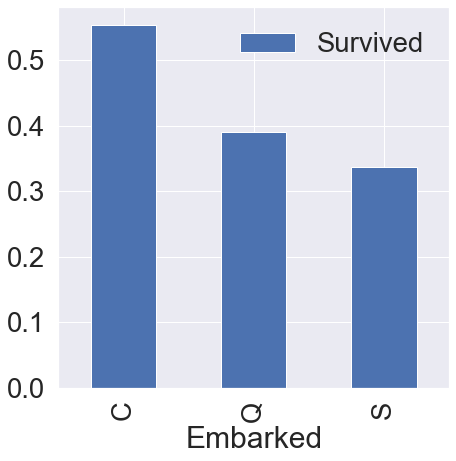

In [50]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax)

In [51]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived') # 오름차순이 기본값

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


In [52]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_index(by = 'Embarked') # 인덱스 정렬도 가능

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


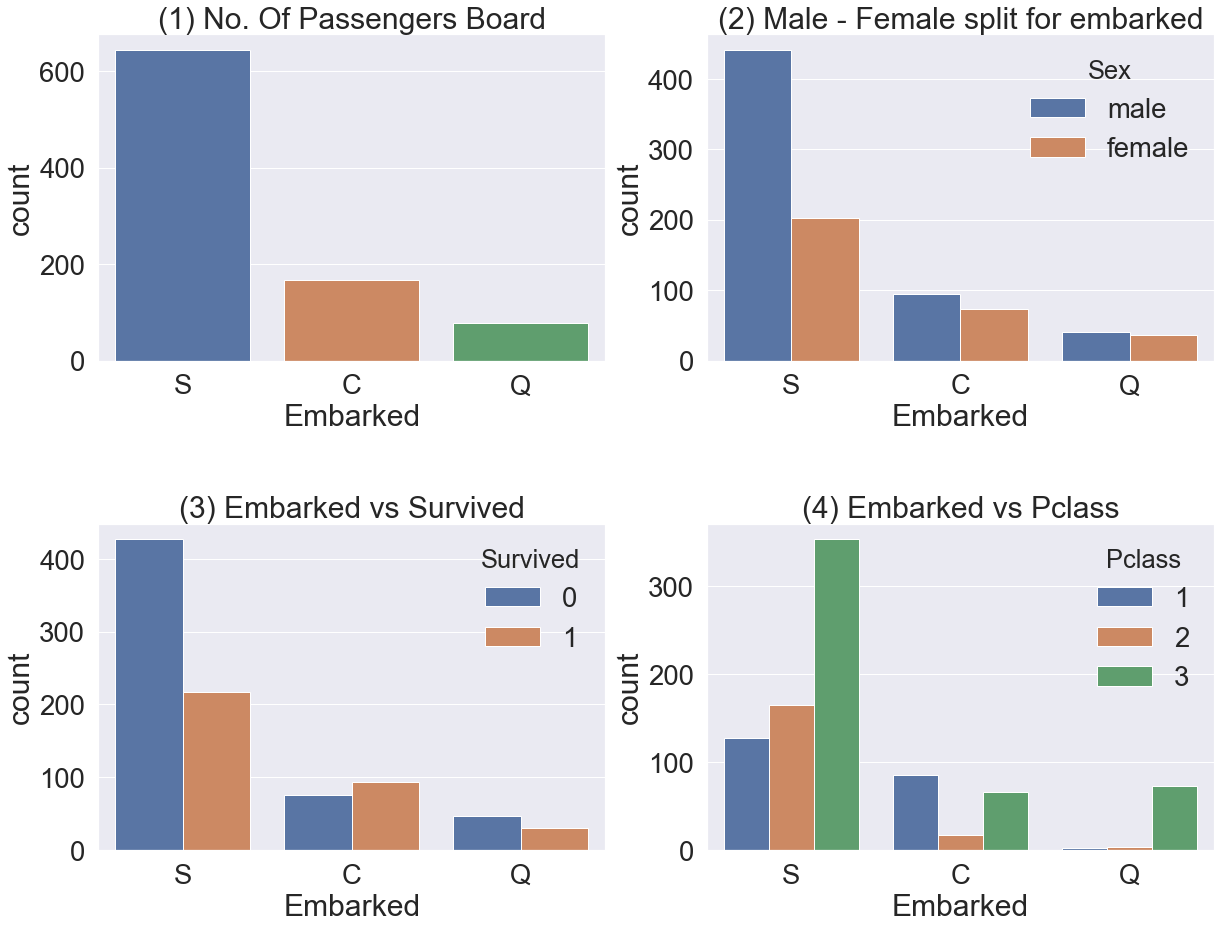

In [53]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = df_train, ax = ax[0, 0])
ax[0, 0].set_title("(1) No. Of Passengers Board")

sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[0, 1])
ax[0, 1].set_title("(2) Male - Female split for embarked")

sns.countplot('Embarked', hue = 'Survived', data = df_train, ax = ax[1, 0])
ax[1, 0].set_title("(3) Embarked vs Survived")

sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[1, 1])
ax[1, 1].set_title("(4) Embarked vs Pclass")

plt.subplots_adjust(wspace = 0.2, hspace = 0.5) # w는 좌우측 그래프간 간격, h는 상하 그래프간 간격
plt.show()

In [54]:
# C에서 승선한 사람들은 여자가 많고, 1등석도 비율상 많으므로 잘 살기도 하고, 그에따라 생존율도 높다.

## 7. EDA - FamilySize

In [55]:
# Family = SibSp + Parch
# 시리즈는 연산이 가능함!
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 본인도 포함
df_test['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [56]:
df_train['FamilySize'].mean()

1.904601571268238

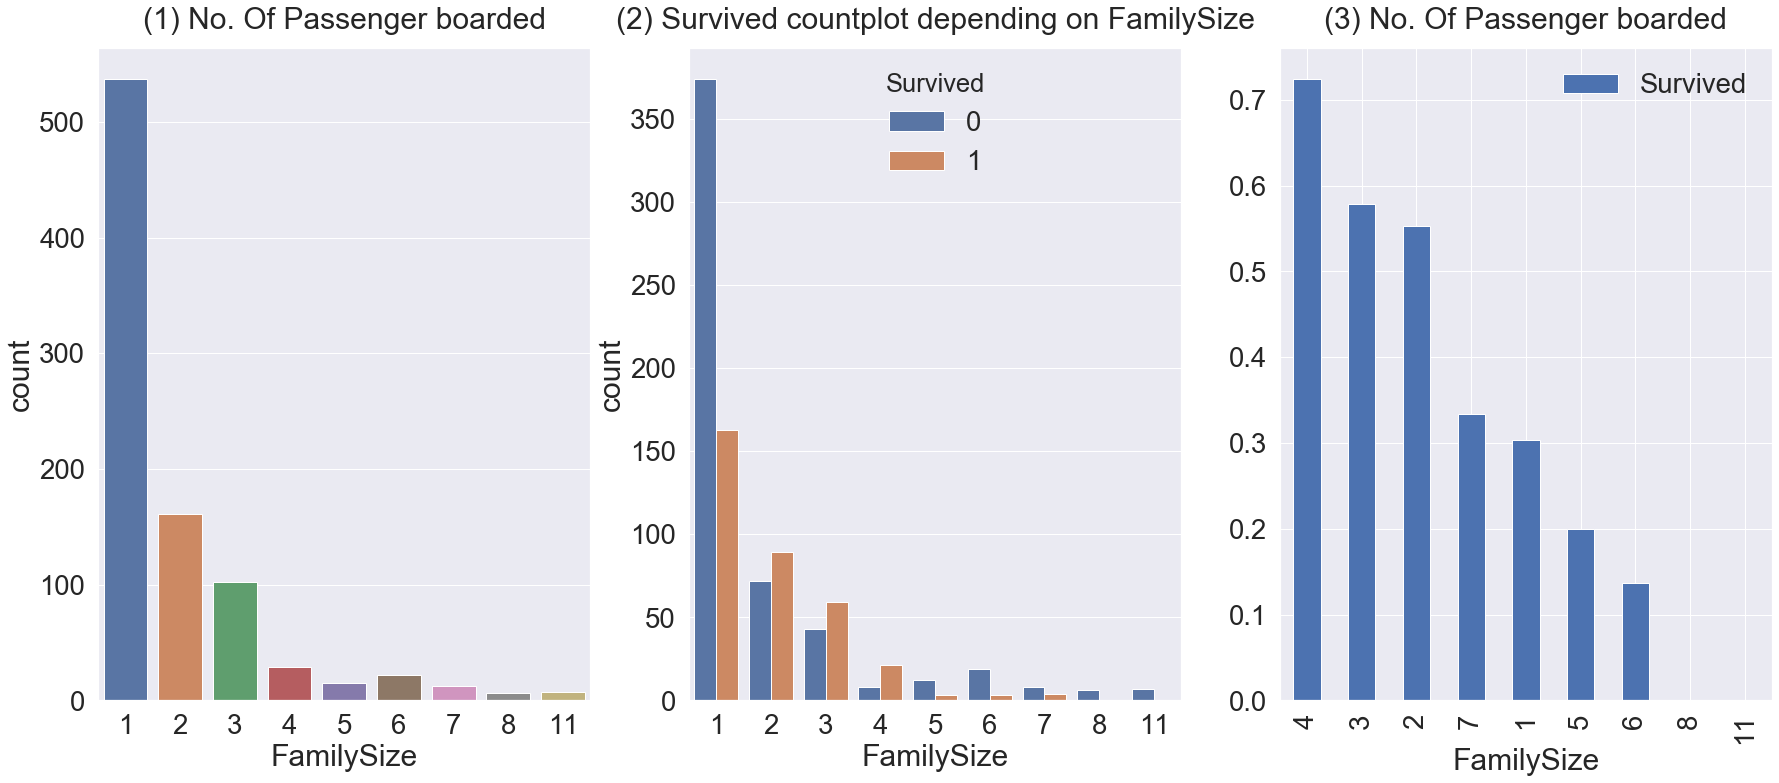

In [57]:
f, ax = plt.subplots(1, 3, figsize = (30, 12))
sns.countplot('FamilySize', data = df_train, ax = ax[0])
ax[0].set_title("(1) No. Of Passenger boarded", y = 1.02)

sns.countplot('FamilySize', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title("(2) Survived countplot depending on FamilySize", y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[2])
ax[2].set_title("(3) No. Of Passenger boarded", y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

# 너무 많거나 적어도 생존률이 떨어진다. 가족이 2~3명일 때 가장 높음

## 8. EDA - Fare, cabin, Ticket

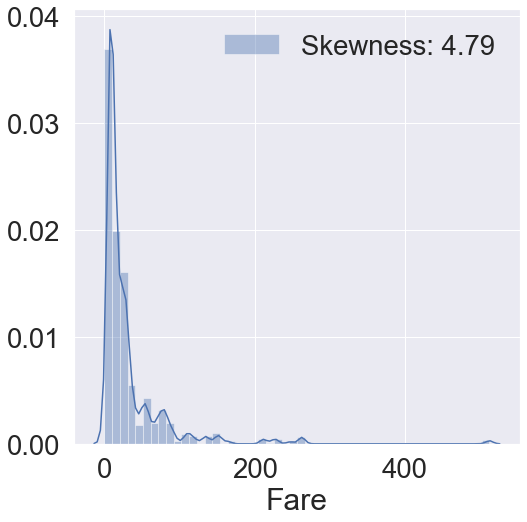

In [58]:
# 너무 좌편향이라 모델에 적합하지 않음
fig, ax = plt.subplots(1, 1, figsize = (8,  8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

In [59]:
# Fare mean값 처리
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
# fare값이 0보다 크면 log를 취하고, 아니면 0의 값을 넣어줌
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i)  if i > 0 else 0); df_train['Fare']
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

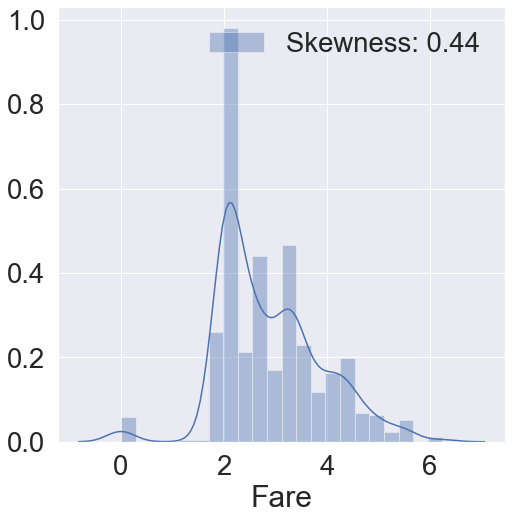

In [60]:
# 이러면 모델에 적합한 값
fig, ax = plt.subplots(1, 1, figsize = (8,  8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

In [61]:
# Cabin은 NaN값이 너무 많아서 생략

In [62]:
df_train['Ticket'].value_counts() # Ticket도 컬럼이 너무 많은데 듀토리얼이라 여기서는 생략

347082               7
1601                 7
CA. 2343             7
3101295              6
CA 2144              6
347088               6
382652               5
S.O.C. 14879         5
113760               4
LINE                 4
W./C. 6608           4
PC 17757             4
349909               4
19950                4
17421                4
2666                 4
347077               4
113781               4
4133                 4
345773               3
F.C.C. 13529         3
29106                3
PC 17755             3
C.A. 31921           3
239853               3
C.A. 34651           3
110152               3
SC/Paris 2123        3
13502                3
PC 17760             3
                    ..
C.A. 34260           1
SC/PARIS 2167        1
113043               1
111428               1
113800               1
2697                 1
244358               1
349215               1
226593               1
A/5. 851             1
349204               1
28664                1
330979     

## 9. Feature engineering - Fill Null in Age

In [63]:
df_train['Age'].isnull().sum() # 177개의 NaN

177

In [64]:
# 첫 단어 다음 띄어쓰기 후 그다음 단어, 그러니까 2어절에 위치하는 값을 찾음. 호칭 확인을 위해d
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.'); df_train['Initial']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Initial, Length: 891, dtype: object

In [65]:
# 테스트 데이터도 수정
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.'); df_test['Initial']

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
5          Mr
6        Miss
7          Mr
8         Mrs
9          Mr
10         Mr
11         Mr
12        Mrs
13         Mr
14        Mrs
15        Mrs
16         Mr
17         Mr
18       Miss
19        Mrs
20         Mr
21     Master
22        Mrs
23         Mr
24        Mrs
25         Mr
26       Miss
27         Mr
28         Mr
29         Mr
        ...  
388        Mr
389    Master
390        Mr
391       Mrs
392    Master
393        Mr
394        Mr
395       Mrs
396        Mr
397       Mrs
398        Mr
399        Mr
400      Miss
401        Mr
402      Miss
403        Mr
404        Mr
405        Mr
406        Mr
407        Mr
408      Miss
409      Miss
410      Miss
411       Mrs
412      Miss
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Initial, Length: 418, dtype: object

In [66]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [67]:
pd.crosstab(df_test['Initial'], df_test['Sex']).T.style.background_gradient(cmap = 'summer_r')

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [68]:
# 여자이름은 Miss, Mrs, 남자 이름은 Mr, 기타는 Other로 네 부류로 통합하고 본 주소값에 반환
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True); df_train['Initial']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886     Other
887      Miss
888      Miss
889        Mr
890        Mr
Name: Initial, Length: 891, dtype: object

In [69]:
# 테스트도 수정
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True); df_test['Initial']

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
5          Mr
6        Miss
7          Mr
8         Mrs
9          Mr
10         Mr
11         Mr
12        Mrs
13         Mr
14        Mrs
15        Mrs
16         Mr
17         Mr
18       Miss
19        Mrs
20         Mr
21     Master
22        Mrs
23         Mr
24        Mrs
25         Mr
26       Miss
27         Mr
28         Mr
29         Mr
        ...  
388        Mr
389    Master
390        Mr
391       Mrs
392    Master
393        Mr
394        Mr
395       Mrs
396        Mr
397       Mrs
398        Mr
399        Mr
400      Miss
401        Mr
402      Miss
403        Mr
404        Mr
405        Mr
406        Mr
407        Mr
408      Miss
409      Miss
410      Miss
411       Mrs
412      Miss
413        Mr
414        Mr
415        Mr
416        Mr
417    Master
Name: Initial, Length: 418, dtype: object

In [70]:
df_train.groupby('Initial').mean() #  상단에서 Master은 안 해줬으니 총 5개.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [71]:
df_test.groupby('Initial').mean() #  상단에서 Master은 안 해줬으니 총 5개.

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,
Master,1123.380952,2.714286,7.406471,1.571429,1.380952,3.112730,2.000000
Miss,1100.240506,2.443038,21.774844,0.544304,0.392405,2.927526,1.860759
Mr,1102.471074,2.309917,32.151351,0.272727,0.177686,2.744519,1.966942
Mrs,1090.097222,1.833333,38.903226,0.597222,0.833333,3.566570,2.083333
Other,1053.500000,1.500000,42.750000,0.500000,0.250000,3.650053,2.250000


In [74]:
# Name x의 Null값을 x라는 이름을 가진 사람들의 평균값으로 변환하고 확인
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = 46

In [75]:
df_train['Age'].isnull().sum() # 다 없어진 것을 확인

0

In [76]:
# 원본을 채웠으니 test도 채우기
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Other'), 'Age'] = 46

In [77]:
df_test['Age'].isnull().sum()

0

In [78]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.616750,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.887097,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.798677,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.984252,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [79]:
df_test.groupby('Initial').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,
Master,1123.380952,2.714286,6.948095,1.571429,1.380952,3.112730,2.000000
Miss,1100.240506,2.443038,21.817595,0.544304,0.392405,2.927526,1.860759
Mr,1102.471074,2.309917,32.351240,0.272727,0.177686,2.744519,1.966942
Mrs,1090.097222,1.833333,38.500000,0.597222,0.833333,3.566570,2.083333
Other,1053.500000,1.500000,42.750000,0.500000,0.250000,3.650053,2.250000


## Feature engineering - Change string to categorical and Pearson coefficient

In [80]:
df_train['Embarked'].isnull().sum() # 결측치가 많지는 않음

2

In [81]:
df_train['Embarked'].fillna('S', inplace = True) # 결측치 값을 S로 바꿔주고 원본에 넣어줌
df_test['Embarked'].fillna('S', inplace = True) # 결측치 값을 S로 바꿔주고 원본에 넣어줌

In [82]:
df_train['Embarked'].isnull().sum()

0

In [83]:
df_test['Embarked'].isnull().sum()

0

In [84]:
df_train['Age_cat'] = 0
df_test['Age_cat'] = 0

In [85]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [86]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(df_train['Age'] >=  10) & (df_train['Age'] < 20),  'Age_cat'] = 1
df_train.loc[(df_train['Age'] >=  20) & (df_train['Age'] < 30),  'Age_cat'] = 2
df_train.loc[(df_train['Age'] >=  30) & (df_train['Age'] < 40),  'Age_cat'] = 3
df_train.loc[(df_train['Age'] >=  40) & (df_train['Age'] < 50),  'Age_cat'] = 4
df_train.loc[(df_train['Age'] >=  50) & (df_train['Age'] < 60),  'Age_cat'] = 5
df_train.loc[(df_train['Age'] >=  60) & (df_train['Age'] < 70),  'Age_cat'] = 6
df_train.loc[df_train['Age'] >= 70,  'Age_cat'] = 7

In [87]:
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(df_test['Age'] >=  10) & (df_test['Age'] < 20),  'Age_cat'] = 1
df_test.loc[(df_test['Age'] >=  20) & (df_test['Age'] < 30),  'Age_cat'] = 2
df_test.loc[(df_test['Age'] >=  30) & (df_test['Age'] < 40),  'Age_cat'] = 3
df_test.loc[(df_test['Age'] >=  40) & (df_test['Age'] < 50),  'Age_cat'] = 4
df_test.loc[(df_test['Age'] >=  50) & (df_test['Age'] < 60),  'Age_cat'] = 5
df_test.loc[(df_test['Age'] >=  60) & (df_test['Age'] < 70),  'Age_cat'] = 6
df_test.loc[df_test['Age'] >= 70,  'Age_cat'] = 7

In [88]:
def category_age(x):
    if x < 10:
        return 0
    elif x< 20:
        return 1
    elif x< 30:
        return 2
    elif x< 40:
        return 3
    elif x< 50:
        return 4
    elif x< 60:
        return 5
    elif x< 70:
        return 6
    else:
        return 7

In [89]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age) # Age에 값 인자로 받아서 함수 적용하는 방법도 가능

In [90]:
(df_train['Age_cat_2'] == df_train['Age_cat']).all() # 전부 다 동일

True

In [91]:
# 둘 다 동일한 걸 확인했으니 삭제
df_train.drop(['Age', 'Age_cat_2'], axis = 1, inplace = True)

In [92]:
# test는 Age만 날림
df_test.drop(['Age'], axis = 1, inplace = True)

## Feature engineering - One-hot encoding on the Initial and Embarked

In [93]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [94]:
df_train['Initial'] = df_train['Initial'].map({"Master" : 0, "Miss" : 1, "Mr" : 2, "Mrs" : 3, "Other" : 4})
df_test['Initial'] = df_test['Initial'].map({"Master" : 0, "Miss" : 1, "Mr" : 2, "Mrs" : 3, "Other" : 4})

In [95]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [96]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [97]:
df_train['Embarked'] = df_train['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})
df_test['Embarked'] = df_test['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

In [98]:
df_train.Embarked.isnull().any()

False

In [99]:
df_test.Embarked.isnull().any()

False

In [100]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [101]:
df_train['Sex'] = df_train['Sex'].map({'male' : 1, 'female' : 0})
df_test['Sex'] = df_test['Sex'].map({'male' : 1, 'female' : 0})

In [102]:
# 위에서 가져옴
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 본인도 포함
df_test['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [103]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

In [104]:
heatmap_data.corr() # 이 표가 아래 그림으로 가는 거임

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.085529,-0.095002
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.133054,-0.314809
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.051687,0.122917
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.019889,0.077791
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.026550,-0.033173
FamilySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,-0.204574,-0.280537
Initial,-0.085529,-0.133054,0.051687,-0.019889,0.026550,-0.204574,1.000000,0.481309
Age_cat,-0.095002,-0.314809,0.122917,0.077791,-0.033173,-0.280537,0.481309,1.000000


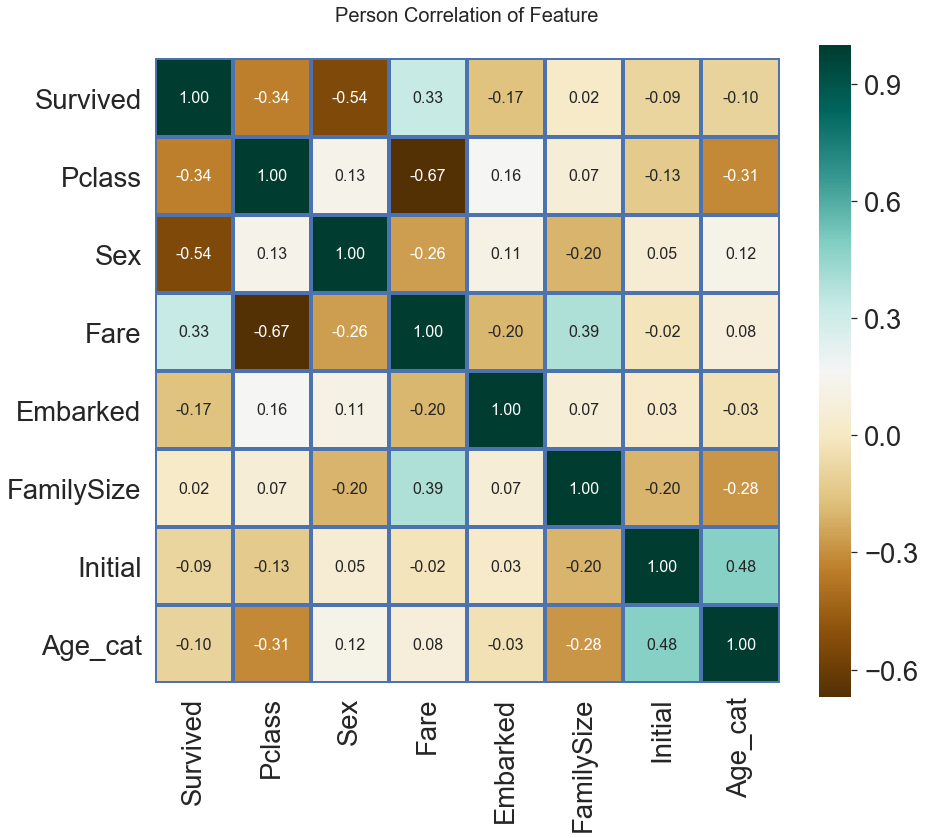

In [105]:
colormap = plt.cm.BrBG
plt.figure(figsize = (14, 12))
plt.title('Person Correlation of Feature', y = 1.05, size = 20)
# linewidths = 네모 상하간격, vmax = 색깔 상한
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 3, vmax = 1.0, 
            # linecolor = 배경 도화지색, annot  = 숫자 넣어줄 건지, annot_kws = 숫자 사이즈
           square = True, cmap = colormap, linecolor = 'B', annot = True, annot_kws = {'size': 16}, fmt = '.2f') # fmt = 반올림

## Feature engineering - One-hot encoding on the Initial and Embarked

In [106]:
# initial
df_train = pd.get_dummies(df_train, columns = ['Initial'], prefix = 'Initial') # 이러면 리턴값에 Initial이 날아감
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix = 'Initial')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [107]:
# Embarked
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'Embarked')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


In [108]:
# 안 쓰는 것들은 뺴줘야 함
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

## Model development - Machine learning l(Randomforest)

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # 모델 평가
from sklearn.model_selection import train_test_split # training set 나누기

In [111]:
X_train = df_train.drop('Survived', axis = 1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [112]:
# 벨리드셋까지 나눠서 해줌
X_tr, X_vid, y_tr, y_vid = train_test_split(X_train, target_label, test_size = 0.3, random_state = 2018)

In [113]:
model = RandomForestClassifier() # RF에 트레이닝셋 학습
model.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
prediction = model.predict(X_vid) # 벨리드셋으로 한번 확인

In [115]:
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1], dtype=int64)

In [116]:
len(prediction)

268

In [117]:
print('총 {}명 중 {:.2f}% 정확도로 생존 맞춤'.format(y_vid.shape[0], 100 * metrics.accuracy_score(prediction, y_vid)))

총 268명 중 82.46% 정확도로 생존 맞춤


## 14. Machine learning prediction - feature importance and prediction on test set

In [118]:
from pandas import Series

In [119]:
model.feature_importances_

array([0.07476752, 0.03944813, 0.35652239, 0.09906138, 0.10747459,
       0.00434476, 0.01863285, 0.24329069, 0.01214743, 0.00640863,
       0.01185843, 0.00988196, 0.01616124])

In [120]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [121]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns)

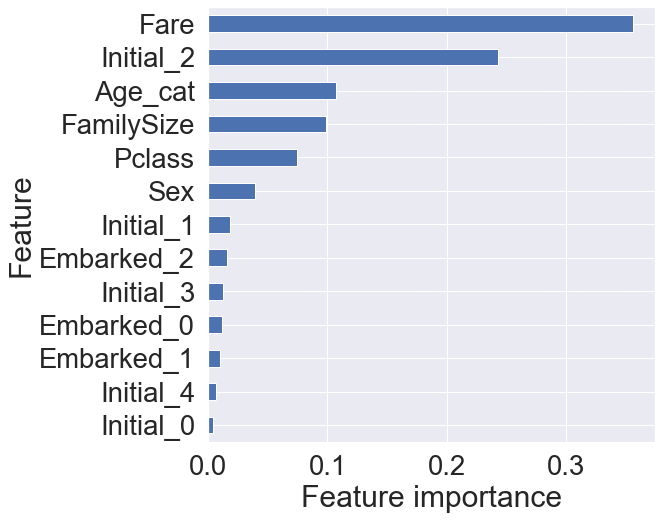

In [122]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [123]:
# Fare가 가장 역할이 큼

In [124]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [125]:
prediction = model.predict(X_test)

In [126]:
np.where(np.isnan(X_test))

(array([], dtype=int64), array([], dtype=int64))

In [127]:
X_test[152]

array([3.        , 1.        , 3.57310907, 1.        , 6.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        ])

In [128]:
df_test.head(153)

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,2,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,2,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,1,2,0,0,0,1,0,0,0,1
5,3,1,2.221917,1,1,0,0,1,0,0,0,0,1
6,3,0,2.031983,1,3,0,1,0,0,0,0,1,0
7,2,1,3.367296,5,2,0,0,1,0,0,0,0,1
8,3,0,1.978128,3,1,0,0,0,1,0,1,0,0
9,3,1,3.184284,2,2,0,0,1,0,0,0,0,1


In [129]:
submission['Survived'] = prediction

In [130]:
submission.to_csv('./my_first_submission.csv', index=False)